# Effective Area

This example introduces the effective areas for a set of X-Ray Telescope (XRT) filter channels paired with thicknesses of the CCD contamination layer at a given date.

In [3]:
import xrtpy

## Contents

1. [Define Filter](#Define-a-filter)
2. [Define Date & Time](#Define-a-date-and-time) 
3. [Effective-Area-Fundamental](#EffectiveAreaFundamental)
4. [Effective Area Function](#Effective-Area-function)
5. [Plot_Effective_Area](#Plotting-the-Effective-Area)


## Define a filter

[X-Ray Filter Channel]: https://xrtpy.readthedocs.io/en/latest

Begin by defining a filter channel by its abbreviation. In this example, we will be exploring aluminum-on-polyimide filter. Reference the [X-Ray Filter Channel] for filter channel information.

In [4]:
filter = "Al-poly"

## Define a date and time

[sunpy-time]: https://docs.sunpy.org/en/stable/guide/time.html

The date and time is defined together. Examples of date and time strings formats can be found at [sunpy-time]. We are going to explore data a year after the spacecraft launch date.

In [5]:
date_time = "2007-09-22T22:00:00"

## EffectiveAreaFundamental

The `EffectiveAreaFundamental` object is where we find the functions and properties used to calculate the effective area. The `xrtpy.response.EffectiveAreaFundamental` object is referenced by inserting the defined `filter` and `date_time`. 

In [6]:
Effective_Area_Fundamental = xrtpy.response.EffectiveAreaFundamental(filter, date_time)

## Effective Area function

The effective area function is exercised by referencing the `effective_area()` function in `Effective_Area_Fundamental`. 

In [7]:
effective_area = Effective_Area_Fundamental.effective_area()

[astropy-quantity]: https://docs.astropy.org/en/stable/api/astropy.units.quantity.Quantity.html

[astropy.units]: https://docs.astropy.org/en/stable/units/index.html


The `effective_area` function returns the effective area for a selected filter, date,and time as an [astropy-quantity] with [astropy.units].  
  

In [8]:
print("Effective Area:\n", effective_area)

Effective Area:
 [2.78457462e-10 7.94914563e-10 2.06647662e-09 ... 2.08471247e-15
 0.00000000e+00 0.00000000e+00] cm2


## Plotting the Effective-Area

We are going to plot the effective area versus the wavelength.

Define the XRT wavelength in `Effective_Area_Fundamental` by referencing `channel_wavelength`.

In [9]:
wavelength = Effective_Area_Fundamental.channel_wavelength

In addition, we are going to plot the effective area near the spacecraft launch date to analyze any difference in the data.  We define the effective area data for the launch date in the same manner as previously shown. 

In [10]:
launch_date_time = "2006-09-22T22:00:00"
EAF = xrtpy.response.EffectiveAreaFundamental(filter, launch_date_time)

In [11]:
launch_date_effective_area = EAF.effective_area()

Create a plotting function that plots the `effective area` and `launch_date_effective_area` versus `wavelegth`. 

In [12]:
import matplotlib.pyplot as plt


def plot_effective_area():

    plt.figure(figsize=(30, 13))

    plt.plot(
        wavelength,
        launch_date_effective_area,
        label="{:} {:}".format(filter, launch_date_time, color="red"),
    )

    plt.plot(wavelength, effective_area, label="{:} {:}".format(filter, date_time))

    plt.title("X-Ray Telescope", fontsize=30)
    plt.xlabel(r"$\lambda$ [Å]", fontsize=30)
    plt.ylabel("effective area $cm^{2}$", fontsize=30)
    plt.legend(fontsize=30)

    plt.xticks(fontsize=27)
    plt.yticks(fontsize=27)
    plt.xlim(0, 60)

    plt.grid(color="lightgrey")
    plt.show()

Call the `plot_effective_area` function to create the plot.

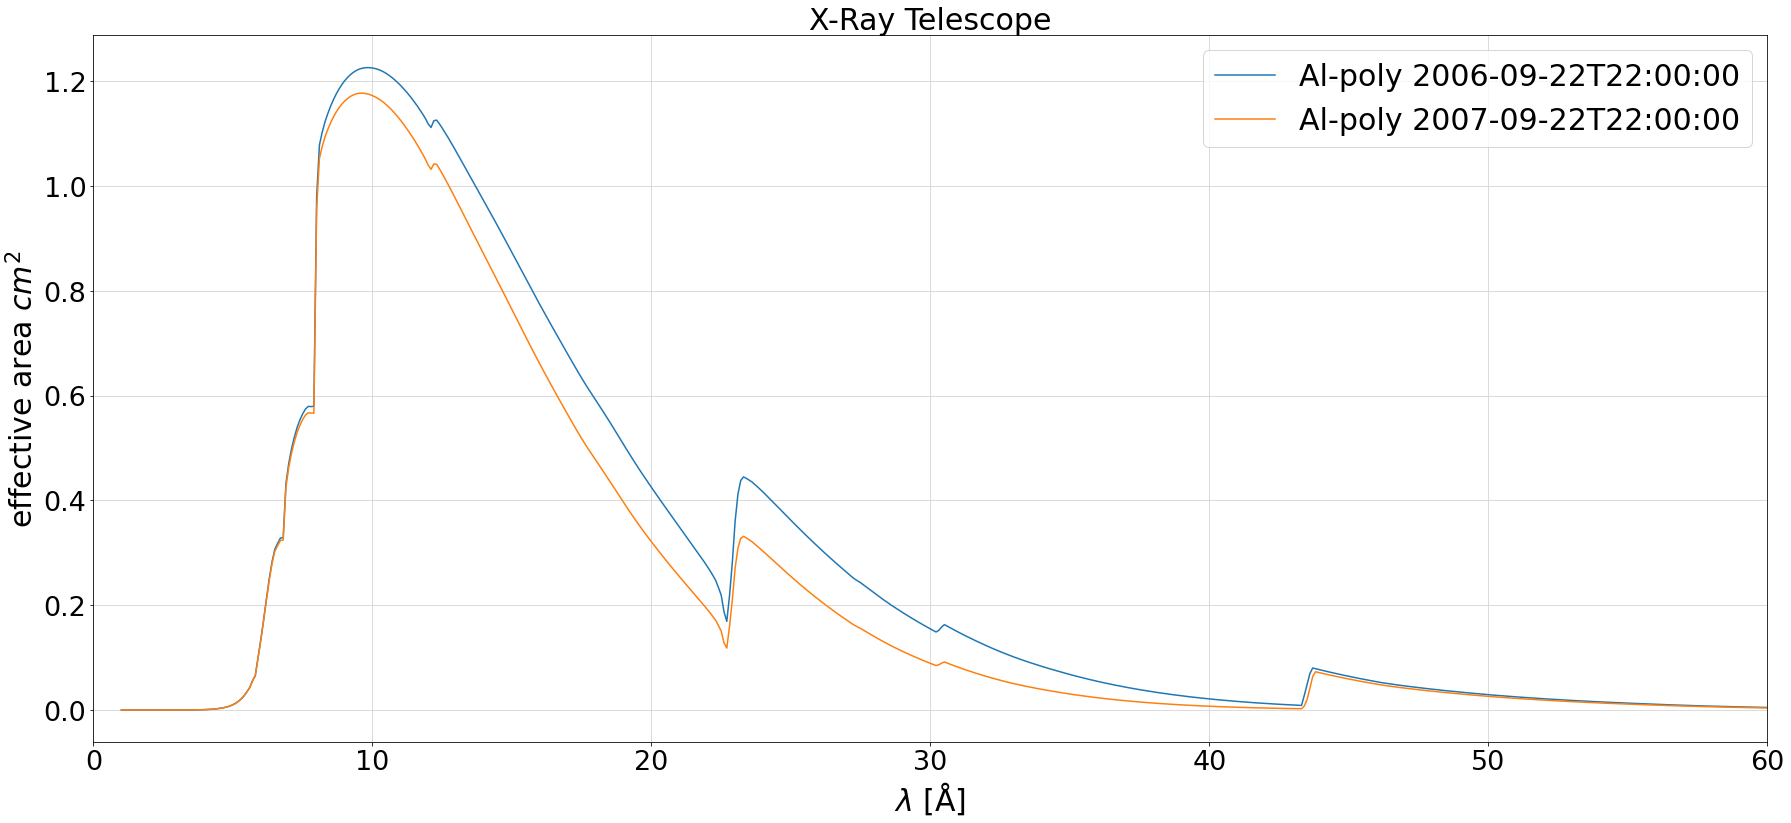

In [13]:
plot_effective_area()

[Montana State University Solar Physics site]: http://solar.physics.montana.edu/HINODE/XRT/xrt_contam_db.html
[Narukage et. al. (2011)]: https://doi.org/10.1007/s11207-010-9685-2

Plotting the effective area at launch date and a year after highlights the differences. This is due to the contamination layer thickness on the CCD. Information about the XRT CCD contaminant layer thickness calculation can be found at [Montana State University Solar Physics site]. In addition, more information can be found referencing [Narukage et. al. (2011)].